In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tabs = pd.ExcelFile("~\\Documents\\Stocks\\marketwatchscrape.xlsx").sheet_names 

In [3]:
msft = [tab for tab in tabs if ("msft" in tab)]
msft

['msft2022-01-03',
 'msft2022-01-04',
 'msft2022-01-05',
 'msft2022-01-07',
 'msft2022-01-20',
 'msft2022-02-07',
 'msft2022-10-26',
 'msft2023-06-03']

In [11]:
def p2f(x):
    if('%' in x):
        return float(x.strip('%'))/100
    elif('B' in x):
        return float(x.strip('B'))*10.**9
headers=pd.read_excel('~\\Documents\\Stocks\\marketwatchscrape.xlsx', sheet_name=msft[-1], skiprows=2,).columns
years = headers[-5:]
df = pd.read_excel('~\\Documents\\Stocks\\marketwatchscrape.xlsx', sheet_name=msft[-1], skiprows=2, converters={x:p2f for x in years})
df=df.iloc[:,16:]

In [12]:
#years=df.columns
salesgrowth = df.iloc[1,1:]
salesgrowth[salesgrowth<0]=0.
Netincomegrowth = df.iloc[39,1:]
Netincomegrowth[Netincomegrowth<0]=0.
EPSgrowth = df.iloc[49,1:]
EPSgrowth[EPSgrowth<0]=0.
EBITDAgrowth = df.iloc[55,1:]
EBITDAgrowth[EBITDAgrowth<0]=0.
salesgrowth

2018       NaN
2019    0.1391
2020    0.1395
2021    0.1753
2022    0.1796
Name: 1, dtype: object

Text(0.5, 1.0, '% EBITDA Growth')

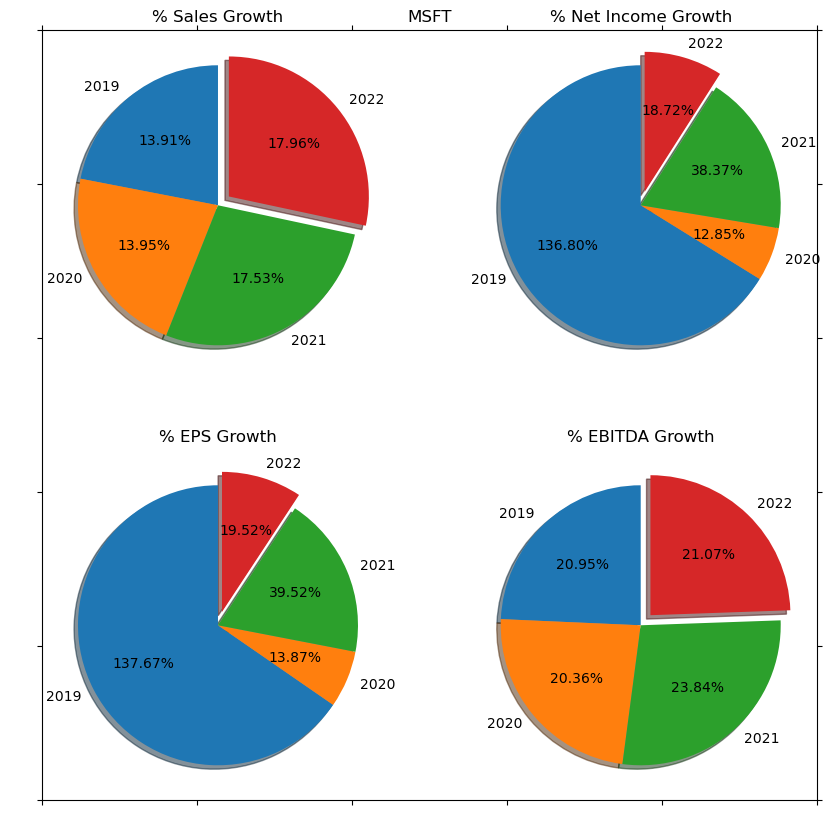

In [13]:
explode = [0. for x in range(1,len(years))]
explode[-1]=0.1
fig, ax = plt.subplots( figsize=(10.0, 10.0) , nrows=1, ncols=1, sharey=False)
#for i, big_ax in enumerate(ax, start=1):
ax.set_title("MSFT")
# Turn off axis lines and ticks of the big subplot 
# obs alpha is 0 in RGBA string!
ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
# removes the white frame
ax._frameon = True
ax1 = fig.add_subplot(2,2,1) 
ax1.pie(salesgrowth[1:],explode=explode, labels=years[1:],autopct=lambda p: '{:.2f}%'.format(p * sum(salesgrowth[1:])),
        shadow=True, startangle=90)
ax1.set_title("% Sales Growth")

ax2 = fig.add_subplot(2,2,2) 
ax2.pie(Netincomegrowth[1:],explode=explode, labels=years[1:],autopct=lambda p: '{:.2f}%'.format(p * sum(Netincomegrowth[1:])),
        shadow=True, startangle=90)
ax2.set_title("% Net Income Growth")

ax3 = fig.add_subplot(2,2,3) 
ax3.pie(EPSgrowth[1:],explode=explode, labels=years[1:],autopct=lambda p: '{:.2f}%'.format(p * sum(EPSgrowth[1:])),
        shadow=True, startangle=90)
ax3.set_title("% EPS Growth")

ax4 = fig.add_subplot(2,2,4) 
ax4.pie(EBITDAgrowth[1:],explode=explode, labels=years[1:],autopct=lambda p: '{:.2f}%'.format(p * sum(EBITDAgrowth[1:])),
        shadow=True, startangle=90)
ax4.set_title("% EBITDA Growth")